<a href="https://colab.research.google.com/github/xai-bio/pancoronavirus-antivirals/blob/main/COVID_19_P2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Exploratory Data Analysis: QSAR Modelling of Chemical Compounds to Discover Potential SARS-CoV-2 Therapeutics by Predicting their Biological Activity**

## **RDKit**
RDKit is a collection of cheminformatics and machine-learning software written in C++ and Python for building predictive models for ADME, Tox, and biological activity. RDKit package consists of the rdkit.Chem package, which consists of sub-packages and sub-modules that enable us to:

* Convert [SMILES](https://en.wikipedia.org/wiki/Simplified_molecular-input_line-entry_system) strings into 2D and 3D molecular structures
* Convert molecular structure into a SMILES string
* Draw and visualise molecules
* Compute molecular weights
* Use [SMARTS](https://en.wikipedia.org/wiki/SMILES_arbitrary_target_specification) to verify whether a molecule has a ring
* Search for substructures
* Construct chemical reactions 
* Modify and fragment molecules
* Draw chemical reactions 
* Generate molecular fingerprints and use them to calculate molecular similarity
* Calculate and visualise [molecular descriptors](https://en.wikipedia.org/wiki/Molecular_descriptor)

There are many more features and functions. Use RDKIt to build features of ml model.   

**Resources:**

* [rdkit.Chem package](https://www.rdkit.org/docs/source/rdkit.Chem.html)
* [RDKit Cookbook](https://www.rdkit.org/docs/Cookbook.html)
* [Getting Started with the RDKit in Python](https://www.rdkit.org/docs/GettingStartedInPython.html#list-of-available-descriptors)
* [List of All Available Descriptors](https://www.rdkit.org/docs/GettingStartedInPython.html#list-of-available-descriptors)
* [RDKit GitHub](https://github.com/rdkit/rdkit) 

## **RAPIDS**

The [RAPIDS](https://rapids.ai/index.html) suite of open source software libraries and APIs enables us to  execute end-to-end data science and analytics pipelines entirely on GPUs. RAPIDS utilizes NVIDIA CUDA primitives for low-level compute optimization, and exposes GPU parallelism and high-bandwidth memory speed through user-friendly Python interfaces. The GPUs powering Colab now use NVIDIA new T4 GPUs.

**Resources:**

* [GPU powered RAPIDS notebook](https://colab.research.google.com/drive/1rY7Ln6rEE1pOlfSHCYOVaqt8OvDO35J0#forceEdit=true&sandboxMode=true&scrollTo=m0jdXBRiDSzj)
* [Data Science on GPUs with RAPIDS](https://medium.com/rapids-ai)
* [RAPIDS GitHub](https://github.com/rapidsai)

In [ ]:
# RDKit and RAPIDS requires installation of Condas environment
# Install Condas in Google Colab 
! pip install -q condacolab

In [ ]:
import condacolab
condacolab.install()

✨🍰✨ Everything looks OK!


In [ ]:
! conda --version

conda 4.12.0


In [ ]:
# Install RDKit (https://anaconda.org/rdkit/rdkit)
! conda install -c rdkit rdkit 

Solving environment: - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - rdkit


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.13.0               |   py37h89c1867_1         989 KB  

In [ ]:
# Click the 'Runtime' dropdown and select 'Change Runtime Type' choose GPU
! nvidia-smi

Fri Jun 17 16:04:39 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   40C    P8    10W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!python rapidsai-csp-utils/colab/install_rapids.py stable
import os
os.environ['NUMBAPRO_NVVM'] = '/usr/local/cuda/nvvm/lib64/libnvvm.so'
os.environ['NUMBAPRO_LIBDEVICE'] = '/usr/local/cuda/nvvm/libdevice/'
os.environ['CONDA_PREFIX'] = '/usr/local'

Found existing installation: cffi 1.15.0
Uninstalling cffi-1.15.0:
  Successfully uninstalled cffi-1.15.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached cffi-1.15.0-cp37-cp37m-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (427 kB)
Installing RAPIDS Stable 21.12
Starting the RAPIDS install on Colab.  This will take about 15 minutes.
Solving environment: ...working... WARNING conda.core.solve:_add_specs(649): pinned spec cudatoolkit=11.1 conflicts with explicit specs.  Overriding pinned spec.
done

# All requested packages already installed.

RAPIDS conda installation complete.  Updating Colab's libraries...
Copying /usr/local/lib/libcudf.so to /usr/lib/libcudf.so
Copying /usr/local/lib/libnccl.so to /usr/lib/libnccl.so
Copying /usr/local/lib/libcuml.so to /usr/lib/libcuml.so
Copying /usr/local/lib/libcugraph.so to /usr/lib/libcugraph.so
Copying /usr/local/lib/libxgboost.so to /usr/lib/libxgboost.so
Copying /usr/local/li

In [ ]:
# Import libraries
import pandas as pd
import cudf
import numpy as np

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/COVID-19 Data/chembl_bioactivity_data_ready.csv')

In [ ]:
# Import RDKit
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

In [ ]:
def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem) 
        moldata.append(mol)
       
    baseData= np.arange(1,1)
    i=0  
    for mol in moldata:        
       
        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)
           
        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])   
    
        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1      
    
    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]   
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)
    
    return descriptors

In [ ]:
df_lipinski = lipinski(df.canonical_smiles)

In [ ]:
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,369.368,3.51522,1.0,4.0
1,226.351,3.30451,0.0,5.0
2,334.400,3.26220,0.0,5.0
3,458.375,2.23320,8.0,11.0
4,237.052,2.22770,0.0,2.0
...,...,...,...,...
97,555.516,7.13050,1.0,4.0
98,182.222,3.20850,0.0,1.0
99,259.740,-1.01410,2.0,2.0
100,357.143,1.45040,1.0,5.0


In [ ]:
df

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL480,Cc1c(OCC(F)(F)F)ccnc1C[S+]([O-])c1nc2ccccc2[nH]1,390.0,active
1,CHEMBL178459,Cc1c(-c2cnccn2)ssc1=S,210.0,active
2,CHEMBL3545157,O=c1sn(-c2cccc3ccccc23)c(=O)n1Cc1ccccc1,80.0,active
3,CHEMBL297453,O=C(O[C@@H]1Cc2c(O)cc(O)cc2O[C@@H]1c1cc(O)c(O)...,1580.0,intermediate
4,CHEMBL4303595,O=C1C=Cc2cc(Br)ccc2C1=O,40.0,active
...,...,...,...,...
97,CHEMBL376488,COc1nc2ccc(Br)cc2cc1[C@@H](c1ccccc1)[C@@](O)(C...,4360.0,intermediate
98,CHEMBL154580,C=CC(=O)c1ccc2ccccc2c1,1240.0,intermediate
99,CHEMBL354349,C[n+]1c2cc(N)ccc2cc2ccc(N)cc21.[Cl-],4980.0,intermediate
100,CHEMBL1382627,Nc1ccc(S(=O)(=O)[N-]c2ncccn2)cc1.[Ag+],750.0,active


In [ ]:
df_combined = pd.concat([df,df_lipinski], axis=1)

In [ ]:
df_combined

,molecule_chembl_id,canonical_smiles,standard_value,class,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL480,Cc1c(OCC(F)(F)F)ccnc1C[S+]([O-])c1nc2ccccc2[nH]1,390.0,active,369.368,3.51522,1.0,4.0
1,CHEMBL178459,Cc1c(-c2cnccn2)ssc1=S,210.0,active,226.351,3.30451,0.0,5.0
2,CHEMBL3545157,O=c1sn(-c2cccc3ccccc23)c(=O)n1Cc1ccccc1,80.0,active,334.400,3.26220,0.0,5.0
3,CHEMBL297453,O=C(O[C@@H]1Cc2c(O)cc(O)cc2O[C@@H]1c1cc(O)c(O)...,1580.0,intermediate,458.375,2.23320,8.0,11.0
4,CHEMBL4303595,O=C1C=Cc2cc(Br)ccc2C1=O,40.0,active,237.052,2.22770,0.0,2.0
...,...,...,...,...,...,...,...,...
97,CHEMBL376488,COc1nc2ccc(Br)cc2cc1[C@@H](c1ccccc1)[C@@](O)(C...,4360.0,intermediate,555.516,7.13050,1.0,4.0
98,CHEMBL154580,C=CC(=O)c1ccc2ccccc2c1,1240.0,intermediate,182.222,3.20850,0.0,1.0
99,CHEMBL354349,C[n+]1c2cc(N)ccc2cc2ccc(N)cc21.[Cl-],4980.0,intermediate,259.740,-1.01410,2.0,2.0
100,CHEMBL1382627,Nc1ccc(S(=O)(=O)[N-]c2ncccn2)cc1.[Ag+],750.0,active,357.143,1.45040,1.0,5.0


In [ ]:
# https://github.com/chaninlab/estrogen-receptor-alpha-qsar/blob/master/02_ER_alpha_RO5.ipynb

import numpy as np

def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', 1)
        
    return x

In [ ]:
df_combined.standard_value.describe()

count     102.000000
mean     1415.588235
std      1420.196314
min        10.000000
25%       220.000000
50%       840.000000
75%      2325.000000
max      4980.000000
Name: standard_value, dtype: float64

In [ ]:
-np.log10( (10**-9)* 100000000 )

1.0

In [ ]:
def norm_value(input):
    norm = []

    for i in input['standard_value']:
        if i > 100000000:
          i = 100000000
        norm.append(i)

    input['standard_value_norm'] = norm
    x = input.drop('standard_value', 1)
        
    return x

In [ ]:
df_norm = norm_value(df_combined)
df_norm

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  # Remove the CWD from sys.path while we load stuff.


,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
0,CHEMBL480,Cc1c(OCC(F)(F)F)ccnc1C[S+]([O-])c1nc2ccccc2[nH]1,active,369.368,3.51522,1.0,4.0,390.0
1,CHEMBL178459,Cc1c(-c2cnccn2)ssc1=S,active,226.351,3.30451,0.0,5.0,210.0
2,CHEMBL3545157,O=c1sn(-c2cccc3ccccc23)c(=O)n1Cc1ccccc1,active,334.400,3.26220,0.0,5.0,80.0
3,CHEMBL297453,O=C(O[C@@H]1Cc2c(O)cc(O)cc2O[C@@H]1c1cc(O)c(O)...,intermediate,458.375,2.23320,8.0,11.0,1580.0
4,CHEMBL4303595,O=C1C=Cc2cc(Br)ccc2C1=O,active,237.052,2.22770,0.0,2.0,40.0
...,...,...,...,...,...,...,...,...
97,CHEMBL376488,COc1nc2ccc(Br)cc2cc1[C@@H](c1ccccc1)[C@@](O)(C...,intermediate,555.516,7.13050,1.0,4.0,4360.0
98,CHEMBL154580,C=CC(=O)c1ccc2ccccc2c1,intermediate,182.222,3.20850,0.0,1.0,1240.0
99,CHEMBL354349,C[n+]1c2cc(N)ccc2cc2ccc(N)cc21.[Cl-],intermediate,259.740,-1.01410,2.0,2.0,4980.0
100,CHEMBL1382627,Nc1ccc(S(=O)(=O)[N-]c2ncccn2)cc1.[Ag+],active,357.143,1.45040,1.0,5.0,750.0


In [ ]:
df_norm.standard_value_norm.describe()

count     102.000000
mean     1415.588235
std      1420.196314
min        10.000000
25%       220.000000
50%       840.000000
75%      2325.000000
max      4980.000000
Name: standard_value_norm, dtype: float64

In [ ]:
df_final = pIC50(df_norm)
df_final

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  del sys.path[0]


,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL480,Cc1c(OCC(F)(F)F)ccnc1C[S+]([O-])c1nc2ccccc2[nH]1,active,369.368,3.51522,1.0,4.0,6.408935
1,CHEMBL178459,Cc1c(-c2cnccn2)ssc1=S,active,226.351,3.30451,0.0,5.0,6.677781
2,CHEMBL3545157,O=c1sn(-c2cccc3ccccc23)c(=O)n1Cc1ccccc1,active,334.400,3.26220,0.0,5.0,7.096910
3,CHEMBL297453,O=C(O[C@@H]1Cc2c(O)cc(O)cc2O[C@@H]1c1cc(O)c(O)...,intermediate,458.375,2.23320,8.0,11.0,5.801343
4,CHEMBL4303595,O=C1C=Cc2cc(Br)ccc2C1=O,active,237.052,2.22770,0.0,2.0,7.397940
...,...,...,...,...,...,...,...,...
97,CHEMBL376488,COc1nc2ccc(Br)cc2cc1[C@@H](c1ccccc1)[C@@](O)(C...,intermediate,555.516,7.13050,1.0,4.0,5.360514
98,CHEMBL154580,C=CC(=O)c1ccc2ccccc2c1,intermediate,182.222,3.20850,0.0,1.0,5.906578
99,CHEMBL354349,C[n+]1c2cc(N)ccc2cc2ccc(N)cc21.[Cl-],intermediate,259.740,-1.01410,2.0,2.0,5.302771
100,CHEMBL1382627,Nc1ccc(S(=O)(=O)[N-]c2ncccn2)cc1.[Ag+],active,357.143,1.45040,1.0,5.0,6.124939


In [ ]:
df_final.pIC50.describe()

count    102.000000
mean       6.180362
std        0.651006
min        5.302771
25%        5.633653
50%        6.075721
75%        6.657577
max        8.000000
Name: pIC50, dtype: float64

In [ ]:
df_final.to_csv('covid19_pIC50.csv')

In [ ]:
df_2class = df_final[df_final['class'] != 'intermediate']
df_2class

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL480,Cc1c(OCC(F)(F)F)ccnc1C[S+]([O-])c1nc2ccccc2[nH]1,active,369.368,3.51522,1.0,4.0,6.408935
1,CHEMBL178459,Cc1c(-c2cnccn2)ssc1=S,active,226.351,3.30451,0.0,5.0,6.677781
2,CHEMBL3545157,O=c1sn(-c2cccc3ccccc23)c(=O)n1Cc1ccccc1,active,334.400,3.26220,0.0,5.0,7.096910
4,CHEMBL4303595,O=C1C=Cc2cc(Br)ccc2C1=O,active,237.052,2.22770,0.0,2.0,7.397940
6,CHEMBL55400,Nc1ccc2cc3ccc(N)cc3nc2c1,active,209.252,2.55240,2.0,3.0,6.443697
7,CHEMBL1886408,CCOC(=O)Cc1ccc(-c2ccccc2)cc1,active,240.302,3.45920,0.0,2.0,6.698970
8,CHEMBL505670,O=[N+]([O-])c1ccc(Sc2cccc[n+]2[O-])c2nonc12,active,290.260,1.91560,0.0,7.0,7.000000
9,CHEMBL460499,CCCCCCNC(=O)n1cc(F)c(=O)[nH]c1=O,active,257.265,0.81370,2.0,4.0,6.795880
12,CHEMBL1096979,NC(CO)C(=O)NNCc1ccc(O)c(O)c1O,active,257.246,-1.75620,7.0,7.0,6.853872
13,CHEMBL164,O=c1c(O)c(-c2cc(O)c(O)c(O)c2)oc2cc(O)cc(O)c12,active,318.237,1.69360,6.0,8.0,6.657577


In [ ]:
df_2class.to_csv('covid19_data_2class_pIC50.csv')

In [ ]:
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt

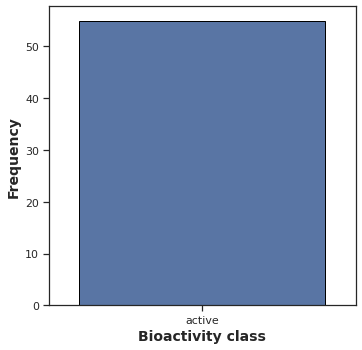

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.countplot(x='class', data=df_2class, edgecolor='black')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.savefig('plot_bioactivity_class.pdf')

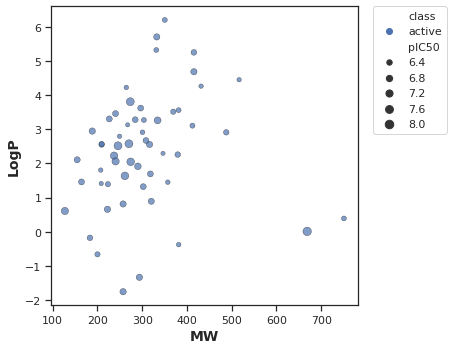

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='MW', y='LogP', data=df_2class, hue='class', size='pIC50', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.savefig('plot_MW_vs_LogP.pdf')